<div class="alert alert-block alert-info">
<span style="font-size:xx-large;"><center>EDO</center></span>
</div>

Here we want to study the time evolution of two populations: hares (`h`) and lynx (`l`).

Their population will be modeled with the Lotka-Volterra equations :
$$\begin{align}
\frac{dh}{dt}(t) &= ah(t) - bh(t)l(t) = rhs_h\left(t, h(t), l(t)\right)\\
\frac{dl}{dt}(t) &= -cl(t) + dh(t)l(t) = rhs_l\left(t, h(t), l(t)\right)\\
\end{align}$$
Using the following assumptions:
- $~h(t)l(t)$ represent the likelyhood of encounter


- $~ah(t)$ represent the natality of hares
- $-bh(t)l(t)$ represent the predation of hares from the lynx


- $-cl(t)$ represent the starvation of lynx in the absence of hares
- $~dh(t)l(t)$ represent the growth of predators (the more they eat, the more they reproduce)

In the following, in order to keep things simple we'll take: $a=b=c=d=1$

We will also need initial values for the populations: $h(t=0) = l(t=0) = 10$

First, define the two functions `rhs_h(t,h,l)` and `rhs_l(t,h,l)`

In [17]:
def rhs_h(t, h, l):
    return h - h * l

In [18]:
def rhs_l(t, h, l):
    return -l + h * l


## Newton explicit

In order to solve this system we can use first order finite difference (from last week).

We can approximate the derivative on the left using a small parameter $\Delta t$:

$$\begin{align}
\frac{h(t+\Delta t) - h(t)}{\Delta t} &= rhs_h\left(t, h(t), l(t)\right)\\
\frac{l(t+\Delta t) - l(t)}{\Delta t} &= rhs_l\left(t, h(t), l(t)\right)\\
\end{align}$$

Which is the same as:
$$\begin{align}
h(t+\Delta t) &= h(t) + \Delta t ~ rhs_h\left(t, h(t), l(t)\right)\\
l(t+\Delta t) &= l(t) + \Delta t ~ rhs_l\left(t, h(t), l(t)\right)\\
\end{align}$$

In other term, knowing the state of the system at a moment ($h(t)$, $l(t)$, $rhs_h(t)$ and $rhs_l(t)$),  
allow us to estimate the state some time $\Delta t$ later (($h(t+\Delta t)$ and $l(t+\Delta t)$)

An another way of seeing this method is that we approximate the functions as lines between each time steps:
<img src="Euler.png" alt="Newton method" style="width: 500px"/>

Define a function `newton(dt, tmax)` that, given a time step and a final time, uses this method to compute:
- `t` : an array with all time steps
- `h` : an array with the evolution of the population of hare 
- `l` : an array with the evolution of the population of lynx

For that:
1. compute the array with all the time steps
2. compute the initial state of `h` and `l` (the first value of the array)
3. compute the other values of `h` and `l`

In [19]:
import numpy as np 
def newton_exp(dt, tmax):

    T = np.arange(0., tmax + dt, dt)
    nt = len(T)
    h = np.zeros_like(T)
    l = np.zeros_like(T)

    # Initial state
    h[0] = 10
    l[0] = 10

    for it in range(nt-1):
        h[it + 1] = h[it] + dt * rhs_h(T[it], h[it], l[it])
        l[it + 1] = l[it] + dt * rhs_l(T[it], h[it], l[it])
    
    return T, h,l

Here is a functon that I will use to plot your results

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as mpatches

def plot(t,h,l, axh, axl, axhl, color):
    
    axh.semilogy(t,h, label="Hares")
    axl.semilogy(t,l, label="Lynx")

    points = np.array([h, l]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap=plt.get_cmap(color))
    lc.set_array(t)
    
    axhl.add_collection(lc)


If your function is well written, the following cell should work

<IPython.core.display.Javascript object>


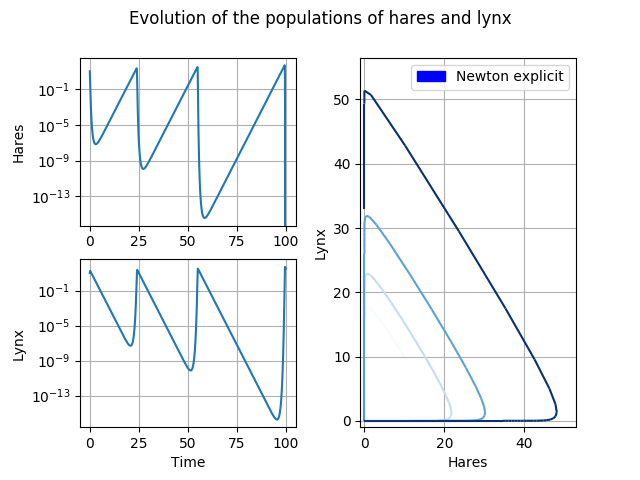

In [21]:
dt = 2e-2
tmax = 100

T1, h1,l1 = newton_exp(dt, tmax)

fig = plt.figure()

axh = plt.subplot(221)
axl = plt.subplot(223)
axhl = plt.subplot(122)
fig.subplots_adjust(wspace=0.3)

plot(T1, h1, l1, axh, axl, axhl, 'Blues')
    
axl.set_xlabel("Time")
axl.set_ylabel("Lynx")
axh.set_ylabel("Hares")

axhl.set_xlabel("Hares")
axhl.set_ylabel("Lynx")

plt.suptitle('Evolution of the populations of hares and lynx') 
axl.grid()
axh.grid()
axhl.grid()

maxh = h1.max()*1.1
maxl = l1.max()*1.1
axhl.set_xlim(-1, maxh)
axhl.set_ylim(-1, maxl)

legend1 = mpatches.Patch(color='Blue', label='Newton explicit')

axhl.legend(handles=[legend1])

plt.show()

## Newton implicit

We can remark that we used a forward differentiation, where we could have used a backward differentiation

$$\begin{align}
\frac{h(t) - h(t-\Delta t)}{\Delta t} &= rhs_h(t)\\
\frac{l(t) - l(t-\Delta t)}{\Delta t} &= rhs_l(t)\\
\end{align}$$

Which is the same as:
$$\begin{align}
h(t+\Delta t) &= h(t) + \Delta t ~ rhs_h(t+\Delta t)\\
l(t+\Delta t) &= l(t) + \Delta t ~ rhs_l(t+\Delta t)\\
\end{align}$$

But we have a problem, we don't know $rhs_h(t+\Delta t)$ and $rhs_l(t+\Delta t)$.  
But we can make the following approximation

$$\begin{align}
rhs_h(t+\Delta t) &\approx h(t+\Delta t) - h(t+\Delta t)l(t)\\
rhs_l(t+\Delta t) &\approx - l(t+\Delta t) + l(t+\Delta t)h(t)
\end{align}$$

Which lead us after some calculus to


$$\begin{align}
h(t+\Delta t) &= \dfrac{h(t)}{1- (1 - l(t))\Delta t}\\
l(t+\Delta t) &= \dfrac{l(t)}{1- (-1 + h(t))\Delta t}\\
\end{align}$$

In [23]:
import numpy as np 
def newton_imp(dt, tmax):

    T = np.arange(0., tmax + dt, dt)
    nt = len(T)
    h = np.zeros_like(T)
    l = np.zeros_like(T)

    # Initial state
    h[0] = 10
    l[0] = 10

    for it in range(nt-1):
        h[it + 1] = h[it] / ( 1 - ( 1 - l[it]) * dt )
        l[it + 1] = l[it] / ( 1 - ( -1 + h[it]) * dt )
    
    return T, h,l

If your function is well written, the following cell should work

<IPython.core.display.Javascript object>


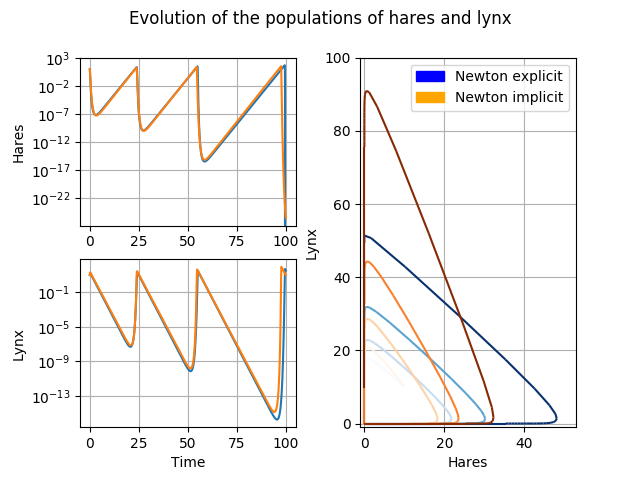

In [24]:
dt = 2e-2
tmax = 100

T2, h2,l2 = newton_imp(dt, tmax)

fig = plt.figure()

axh = plt.subplot(221)
axl = plt.subplot(223)
axhl = plt.subplot(122)
fig.subplots_adjust(wspace=0.3)

plot(T1, h1, l1, axh, axl, axhl, 'Blues')
plot(T2, h2, l2, axh, axl, axhl, 'Oranges')
    
axl.set_xlabel("Time")
axl.set_ylabel("Lynx")
axh.set_ylabel("Hares")

axhl.set_xlabel("Hares")
axhl.set_ylabel("Lynx")

plt.suptitle('Evolution of the populations of hares and lynx') 
axl.grid()
axh.grid()
axhl.grid()

maxh = max(h1.max(), h2.max())*1.1
maxl = max(l1.max(), l2.max())*1.1
axhl.set_xlim(-1, maxh)
axhl.set_ylim(-1, maxl)

legend1 = mpatches.Patch(color='Blue', label='Newton explicit')
legend2 = mpatches.Patch(color='orange', label='Newton implicit')

axhl.legend(handles=[legend1,legend2])

plt.show()

## Adams Bashforth

Instead of making some weird approximation of $rhs_h(t+\Delta t)$ (taking some term at time $t$ some other at $t+\Delta t$ more or less randomly), we can **extrapolate** those values from previous time.

This is the main idea of the Adams Bashforth family methods.

Here we will use the second order version : $ f(x+\Delta t) = \frac{3}{2} f(x) - \frac{1}{2} f(x-\Delta t)$

Since we need to time step to use this method, we wee make a first step with the newton method.

Define a function `adams(dt, tmax)` that, given a time step and a final time, uses this method to compute:
- `t` : an array with all time steps
- `h` : an array with the evolution of the population of hare 
- `l` : an array with the evolution of the population of lynx

For that:
1. compute the array with all the time steps
2. compute the initial state for `h` and `l`
3. compute one step of the newton method
4. compute the rest of the values of `h` and `l`

In [25]:
import numpy as np 
def adams(dt, tmax):

    T = np.arange(0., tmax + dt, dt)
    nt = len(T)
    h = np.zeros_like(T)
    l = np.zeros_like(T)

    # Initial state
    h[0] = 10
    l[0] = 10

    # first steps
    for it in range(1):
        h[it + 1] = h[it] + dt * rhs_h(T[it], h[it], l[it])
        l[it + 1] = l[it] + dt * rhs_l(T[it], h[it], l[it])
    
    for it in range(1, nt-1):
        h[it + 1] = (h[it] + 1.5*dt * rhs_h(T[it], h[it], l[it])
                           - 0.5*dt * rhs_h(T[it-1], h[it-1], l[it-1]))
        l[it + 1] = (l[it] + 1.5*dt * rhs_l(T[it], h[it], l[it])
                           - 0.5*dt * rhs_l(T[it-1], h[it-1], l[it-1]))
    
    return T, h,l

If your function is well written, the following cell should work

<IPython.core.display.Javascript object>


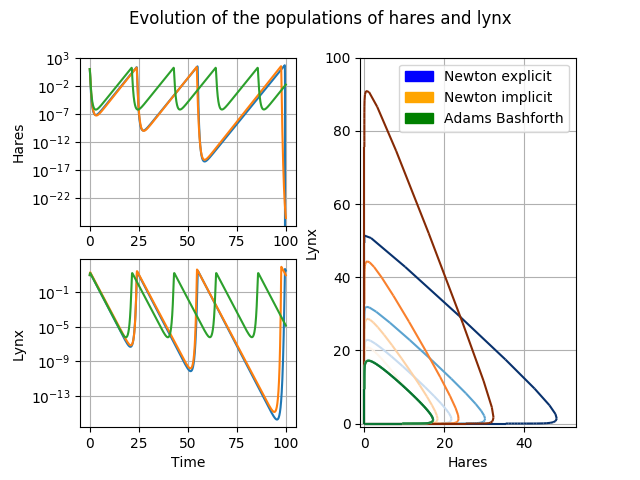

In [26]:
dt = 1e-2
tmax = 100

T3, h3,l3 = adams(dt, tmax)

fig = plt.figure()

axh = plt.subplot(221)
axl = plt.subplot(223)
axhl = plt.subplot(122)
fig.subplots_adjust(wspace=0.3)

plot(T1, h1, l1, axh, axl, axhl, 'Blues')
plot(T2, h2, l2, axh, axl, axhl, 'Oranges')
plot(T3, h3, l3, axh, axl, axhl, 'Greens')
    
axl.set_xlabel("Time")
axl.set_ylabel("Lynx")
axh.set_ylabel("Hares")

axhl.set_xlabel("Hares")
axhl.set_ylabel("Lynx")

plt.suptitle('Evolution of the populations of hares and lynx') 
axl.grid()
axh.grid()
axhl.grid()

maxh = max(h1.max(), h2.max())*1.1
maxl = max(l1.max(), l2.max())*1.1
axhl.set_xlim(-1, maxh)
axhl.set_ylim(-1, maxl)

legend1 = mpatches.Patch(color='Blue', label='Newton explicit')
legend2 = mpatches.Patch(color='Orange', label='Newton implicit')
legend3 = mpatches.Patch(color='Green', label='Adams Bashforth')

axhl.legend(handles=[legend1,legend2, legend3])

plt.show()


## Runge-Kutta

We can be smarter on the extrapolation of $rhs_h$ and $rhs_l$.

We can make multiple sub-step following this idea:
<img src="rk.GIF" alt="Runge-Kutta method" style="width: 400px"/>

For each time step,
- we make half a newton step and compute $h(t + \frac{\Delta t}{2})$ and $l(t + \frac{\Delta t}{2})$
- use those values to compute an estimation of 
  - $\dfrac{dh}{dt}(t + \frac{\Delta t}{2}) \approx rhs_h\left(t + \frac{\Delta t}{2}, h(t + \frac{\Delta t}{2}), l(t + \frac{\Delta t}{2})\right)$
  - $\dfrac{dl}{dt}(t + \frac{\Delta t}{2}) \approx rhs_l\left(t + \frac{\Delta t}{2}, h(t + \frac{\Delta t}{2}), l(t + \frac{\Delta t}{2})\right)$
- 

- The first slope is the value of $rhs(t)$ (definition of the derivative)
- making half an explicit newton step allows us to have a better idea of the slope between $t$ and $t + \Delta t$
- We can use this new slope to move forward

In our case, we will consider the classical version of this version with 4 steps:

For each time step,
- we name `k1` the slope at the time $t$
- we make half the newton step to make an estimation `k2` of  the slope at the time $t + \frac{\Delta t}{2}$
- we repeat the previous step using `k2` to make an even better estimation `k3` of the slope at the time $t + \frac{\Delta t}{2}$
- we make a full newton step using `k3` to make an estimation `k4` of  the slope at the time $t + \Delta t$
- we can combines those slopes to make the best estimation possible : $ k = \frac{k1 + 2k2 + 2k3 + k4}{6}$
- finally we can make a full newton step using `k` to compute $h(t + \Delta t)$


- we do the same process simultaneously for $l$

In [36]:
import numpy as np 
def rk(dt, tmax):

    T = np.arange(0., tmax + dt, dt)
    nt = len(T)
    h = np.zeros_like(T)
    l = np.zeros_like(T)

    # Initial state
    h[0] = 10
    l[0] = 10

    for it in range(nt-1):
        
        k1h = rhs_h(T[it], h[it], l[it])
        k1l = rhs_l(T[it], h[it], l[it])
        
        k2h = rhs_h(T[it]+dt/2, h[it]+dt*k1h/2, l[it]+dt*k1l/2)
        k2l = rhs_l(T[it]+dt/2, h[it]+dt*k1h/2, l[it]+dt*k1l/2)
        
        k3h = rhs_h(T[it]+dt/2, h[it]+dt*k2h/2, l[it]+dt*k2l/2)
        k3l = rhs_l(T[it]+dt/2, h[it]+dt*k2h/2, l[it]+dt*k2l/2)
                
        k4h = rhs_h(T[it]+dt, h[it]+dt*k3h, l[it]+dt*k3l)
        k4l = rhs_l(T[it]+dt, h[it]+dt*k3h, l[it]+dt*k3l)

        kh = (k1h + 2 * k2h + 2 * k3h + k4h) / 6
        kl = (k1l + 2 * k2l + 2 * k3l + k4l) / 6
        
        h[it + 1] = h[it] + dt * kh
        l[it + 1] = l[it] + dt * kl
    
    return T, h,l

If your function is well written, the following cell should work

<IPython.core.display.Javascript object>


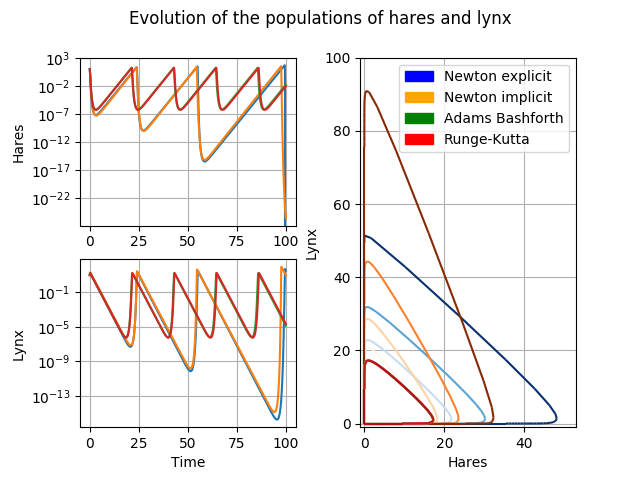

In [37]:
dt = 1e-2
tmax = 100

T4, h4,l4 = rk(dt, tmax)

fig = plt.figure()

axh = plt.subplot(221)
axl = plt.subplot(223)
axhl = plt.subplot(122)
fig.subplots_adjust(wspace=0.3)

plot(T1, h1, l1, axh, axl, axhl, 'Blues')
plot(T2, h2, l2, axh, axl, axhl, 'Oranges')
plot(T3, h3, l3, axh, axl, axhl, 'Greens')
plot(T4, h4, l4, axh, axl, axhl, 'Reds')
    
axl.set_xlabel("Time")
axl.set_ylabel("Lynx")
axh.set_ylabel("Hares")

axhl.set_xlabel("Hares")
axhl.set_ylabel("Lynx")

plt.suptitle('Evolution of the populations of hares and lynx') 
axl.grid()
axh.grid()
axhl.grid()

maxh = max(h1.max(), h2.max())*1.1
maxl = max(l1.max(), l2.max())*1.1
axhl.set_xlim(-1, maxh)
axhl.set_ylim(-1, maxl)

legend1 = mpatches.Patch(color='Blue', label='Newton explicit')
legend2 = mpatches.Patch(color='Orange', label='Newton implicit')
legend3 = mpatches.Patch(color='Green', label='Adams Bashforth')
legend4 = mpatches.Patch(color='Red', label='Runge-Kutta')

axhl.legend(handles=[legend1, legend2, legend3, legend4])

plt.show()

<div class="alert alert-block alert-danger">
<span style="font-size:xx-large;">
    <center>
        **Do not forget**
    </center>
</span>
</div>

Once all cells have been **filled** and **executed**, save this document as a pdf file (by printing it)  
Check that everything is present on the produced pdf  
Send it to me via Universitice  
This will be used to evaluate you.

<div class="alert alert-block alert-info">
<span style="font-size:xx-large;"><center>That's it for today !</center></span>
</div>